## Wavelet data generation..

In [1]:
def func(cls):
  img_names = os.listdir('genres/'+cls)
  os.makedirs('wavelets/train/'+cls)
  os.makedirs('wavelets/test/'+cls)
  print(cls)
  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
    cnt+=1
    x , sr = librosa.load('genres/'+cls+'/'+nm)
    #plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x)
    plt.savefig('wavelets/train/'+cls+'/'+str(cnt)+'.png')
    plt.close()
  
  cnt = 0
  for nm in test_names:
    cnt+=1
    x , sr = librosa.load('genres/'+cls+'/'+nm)
    #plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x)
    plt.savefig('wavelets/test/'+cls+'/'+str(cnt)+'.png')
    plt.close()

In [2]:
import os
classes = [a for a in os.listdir('genres') if '.' not in a]
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


## Spectrogram generation..

In [3]:
import librosa
import matplotlib.pyplot as plt
import librosa.display


def func1(cls):
  img_names = os.listdir('genres/'+cls)
  os.makedirs('spectrogram/train/'+cls)
  os.makedirs('spectrogram/test/'+cls)
  print(cls)
  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
    cnt+=1
    x , sr = librosa.load('genres/'+cls+'/'+nm)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig('spectrogram/train/'+cls+'/'+str(cnt)+'.png')
    plt.close()
  
  cnt = 0
  for nm in test_names:
    cnt+=1
    x , sr = librosa.load('genres/'+cls+'/'+nm)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig('spectrogram/test/'+cls+'/'+str(cnt)+'.png')
    plt.close()

In [4]:
import os
classes = [a for a in os.listdir('genres') if '.' not in a]
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


## Model training..

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [23]:
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [24]:
train = get_data('spectrogram/train')
val = get_data('spectrogram/test')

C:\ProgramData\Anaconda3\envs\MAIBsem1\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [25]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [26]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [27]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)       

In [28]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

C:\ProgramData\Anaconda3\envs\MAIBsem1\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [30]:
history = model.fit(x_train,y_train,epochs = 150, validation_data = (x_val, y_val))

Epoch 1/150
19/19 [==============================] - 20s 1s/step - loss: 2.1577 - accuracy: 0.1917 - val_loss: 2.1288 - val_accuracy: 0.2500
Epoch 2/150
19/19 [==============================] - 19s 1s/step - loss: 2.0470 - accuracy: 0.2467 - val_loss: 2.0670 - val_accuracy: 0.2350
Epoch 3/150
19/19 [==============================] - 20s 1s/step - loss: 1.9157 - accuracy: 0.2983 - val_loss: 1.9655 - val_accuracy: 0.3325
Epoch 4/150
19/19 [==============================] - 20s 1s/step - loss: 1.7976 - accuracy: 0.3350 - val_loss: 1.9574 - val_accuracy: 0.3100
Epoch 5/150
19/19 [==============================] - 19s 997ms/step - loss: 1.7406 - accuracy: 0.3600 - val_loss: 1.9365 - val_accuracy: 0.3475
Epoch 6/150
19/19 [==============================] - 19s 1s/step - loss: 1.6419 - accuracy: 0.4133 - val_loss: 1.8751 - val_accuracy: 0.3225
Epoch 7/150
19/19 [==============================] - 19s 1s/step - loss: 1.5964 - accuracy: 0.4300 - val_loss: 1.8820 - val_accuracy: 0.3475
Epoch 8/15

19/19 [==============================] - 18s 949ms/step - loss: 0.6178 - accuracy: 0.7983 - val_loss: 1.8162 - val_accuracy: 0.4150
Epoch 59/150
19/19 [==============================] - 18s 943ms/step - loss: 0.5698 - accuracy: 0.8117 - val_loss: 1.8247 - val_accuracy: 0.4425
Epoch 60/150
19/19 [==============================] - 18s 978ms/step - loss: 0.5587 - accuracy: 0.8083 - val_loss: 1.8236 - val_accuracy: 0.4150
Epoch 61/150
19/19 [==============================] - 18s 957ms/step - loss: 0.5428 - accuracy: 0.8217 - val_loss: 1.7740 - val_accuracy: 0.4375
Epoch 62/150
19/19 [==============================] - 18s 947ms/step - loss: 0.5043 - accuracy: 0.8417 - val_loss: 1.8429 - val_accuracy: 0.4050
Epoch 63/150
19/19 [==============================] - 18s 942ms/step - loss: 0.5029 - accuracy: 0.8417 - val_loss: 1.7768 - val_accuracy: 0.4250
Epoch 64/150
19/19 [==============================] - 18s 964ms/step - loss: 0.4990 - accuracy: 0.8450 - val_loss: 1.8744 - val_accuracy: 0.445

19/19 [==============================] - 18s 968ms/step - loss: 0.1432 - accuracy: 0.9683 - val_loss: 2.2388 - val_accuracy: 0.4550
Epoch 115/150
19/19 [==============================] - 18s 968ms/step - loss: 0.1281 - accuracy: 0.9800 - val_loss: 2.2760 - val_accuracy: 0.4775
Epoch 116/150
19/19 [==============================] - 18s 952ms/step - loss: 0.1175 - accuracy: 0.9817 - val_loss: 2.2149 - val_accuracy: 0.4750
Epoch 117/150
19/19 [==============================] - 19s 984ms/step - loss: 0.1235 - accuracy: 0.9683 - val_loss: 2.3340 - val_accuracy: 0.4375
Epoch 118/150
19/19 [==============================] - 18s 943ms/step - loss: 0.1412 - accuracy: 0.9683 - val_loss: 2.4032 - val_accuracy: 0.4475
Epoch 119/150
19/19 [==============================] - 19s 981ms/step - loss: 0.1361 - accuracy: 0.9700 - val_loss: 2.1771 - val_accuracy: 0.4825
Epoch 120/150
19/19 [==============================] - 18s 958ms/step - loss: 0.1173 - accuracy: 0.9817 - val_loss: 2.3513 - val_accuracy:

In [35]:
import pickle
model.save_weights('500_epoch_simple_lr.cpkt')

pickle.dump(history.history, open('history_500_epoch_simple.pkl','wb'))

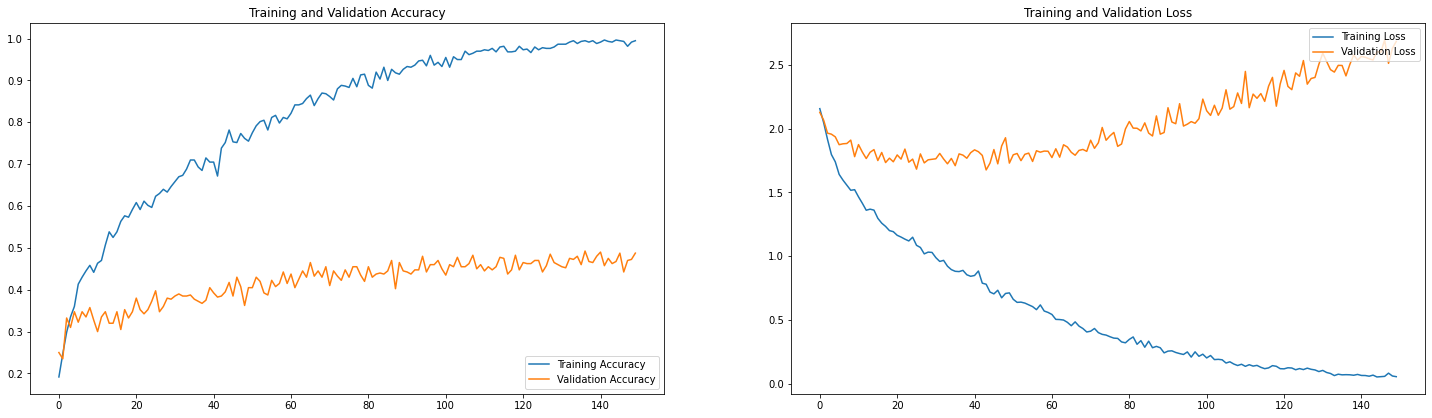

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
import pickle
history = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(150)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('sim_plot1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1080x432 with 0 Axes>

In [47]:
predictions = np.argmax(model.predict(x_val), axis=-1) #model.predict(x_val) #np.argmax(model.predict(x), axis=-1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

              precision    recall  f1-score   support

       blues       0.43      0.47      0.45        40
   classical       0.89      0.82      0.86        40
     country       0.41      0.50      0.45        40
       disco       0.57      0.20      0.30        40
      hiphop       0.30      0.57      0.40        40
        jazz       0.46      0.42      0.44        40
       metal       0.72      0.72      0.73        40
         pop       0.83      0.60      0.70        40
      reggae       0.31      0.33      0.32        40
        rock       0.28      0.23      0.25        40

    accuracy                           0.49       400
   macro avg       0.52      0.49      0.49       400
weighted avg       0.52      0.49      0.49       400



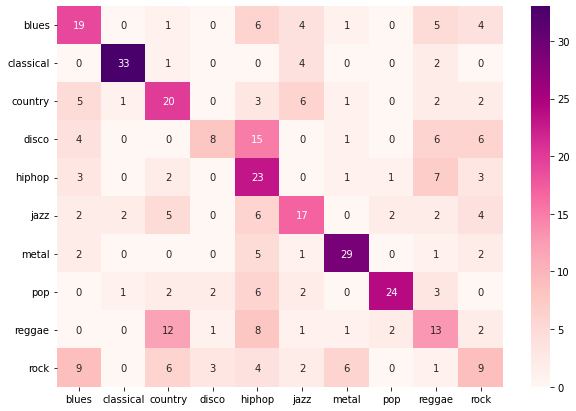

In [48]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx1.png',bbox_inches = 'tight')

# Transfer Learning based modeling

In [49]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")

9420800/9406464 [==============================] - 0s 0us/step


In [50]:
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(10, activation="softmax")                                     
                                ])

In [51]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

C:\ProgramData\Anaconda3\envs\MAIBsem1\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500


C:\ProgramData\Anaconda3\envs\MAIBsem1\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


19/19 [==============================] - 20s 981ms/step - loss: 2.6705 - accuracy: 0.0933 - val_loss: 2.5148 - val_accuracy: 0.0700
Epoch 2/500
19/19 [==============================] - 17s 902ms/step - loss: 2.4934 - accuracy: 0.1050 - val_loss: 2.3917 - val_accuracy: 0.0950
Epoch 3/500
19/19 [==============================] - 17s 898ms/step - loss: 2.3679 - accuracy: 0.1050 - val_loss: 2.3078 - val_accuracy: 0.1075
Epoch 4/500
19/19 [==============================] - 17s 902ms/step - loss: 2.2584 - accuracy: 0.1467 - val_loss: 2.2486 - val_accuracy: 0.1175
Epoch 5/500
19/19 [==============================] - 17s 898ms/step - loss: 2.2096 - accuracy: 0.1683 - val_loss: 2.1986 - val_accuracy: 0.1475
Epoch 6/500
19/19 [==============================] - 17s 898ms/step - loss: 2.1198 - accuracy: 0.2100 - val_loss: 2.1602 - val_accuracy: 0.1725
Epoch 7/500
19/19 [==============================] - 17s 904ms/step - loss: 2.0730 - accuracy: 0.2417 - val_loss: 2.1228 - val_accuracy: 0.1975
Epoc

Epoch 58/500
19/19 [==============================] - 17s 924ms/step - loss: 1.2473 - accuracy: 0.5617 - val_loss: 1.6480 - val_accuracy: 0.3800
Epoch 59/500
19/19 [==============================] - 17s 920ms/step - loss: 1.2289 - accuracy: 0.5767 - val_loss: 1.6430 - val_accuracy: 0.3850
Epoch 60/500
19/19 [==============================] - 17s 919ms/step - loss: 1.2275 - accuracy: 0.5717 - val_loss: 1.6407 - val_accuracy: 0.3850
Epoch 61/500
19/19 [==============================] - 17s 919ms/step - loss: 1.2424 - accuracy: 0.5717 - val_loss: 1.6377 - val_accuracy: 0.3775
Epoch 62/500
19/19 [==============================] - 17s 926ms/step - loss: 1.2346 - accuracy: 0.5683 - val_loss: 1.6346 - val_accuracy: 0.3825
Epoch 63/500
19/19 [==============================] - 17s 933ms/step - loss: 1.2333 - accuracy: 0.5767 - val_loss: 1.6315 - val_accuracy: 0.3800
Epoch 64/500
19/19 [==============================] - 18s 981ms/step - loss: 1.2088 - accuracy: 0.6050 - val_loss: 1.6277 - val_ac

Epoch 115/500
19/19 [==============================] - 19s 1s/step - loss: 1.0012 - accuracy: 0.6633 - val_loss: 1.5085 - val_accuracy: 0.4075
Epoch 116/500
19/19 [==============================] - 17s 926ms/step - loss: 0.9941 - accuracy: 0.6750 - val_loss: 1.5063 - val_accuracy: 0.4100
Epoch 117/500
19/19 [==============================] - 21s 1s/step - loss: 0.9746 - accuracy: 0.6717 - val_loss: 1.5035 - val_accuracy: 0.4100
Epoch 118/500
19/19 [==============================] - 18s 978ms/step - loss: 0.9856 - accuracy: 0.6650 - val_loss: 1.5026 - val_accuracy: 0.4125
Epoch 119/500
19/19 [==============================] - 17s 925ms/step - loss: 0.9747 - accuracy: 0.6717 - val_loss: 1.5012 - val_accuracy: 0.4100
Epoch 120/500
19/19 [==============================] - 17s 931ms/step - loss: 0.9863 - accuracy: 0.6800 - val_loss: 1.5008 - val_accuracy: 0.4125
Epoch 121/500
19/19 [==============================] - 17s 921ms/step - loss: 0.9856 - accuracy: 0.6733 - val_loss: 1.5009 - val_a

Epoch 172/500
19/19 [==============================] - 19s 999ms/step - loss: 0.8433 - accuracy: 0.7250 - val_loss: 1.4292 - val_accuracy: 0.4575
Epoch 173/500
19/19 [==============================] - 18s 988ms/step - loss: 0.8576 - accuracy: 0.7350 - val_loss: 1.4295 - val_accuracy: 0.4575
Epoch 174/500
19/19 [==============================] - 17s 929ms/step - loss: 0.8583 - accuracy: 0.7483 - val_loss: 1.4303 - val_accuracy: 0.4625
Epoch 175/500
19/19 [==============================] - 17s 923ms/step - loss: 0.8361 - accuracy: 0.7367 - val_loss: 1.4283 - val_accuracy: 0.4675
Epoch 176/500
19/19 [==============================] - 17s 905ms/step - loss: 0.8365 - accuracy: 0.7467 - val_loss: 1.4244 - val_accuracy: 0.4650
Epoch 177/500
19/19 [==============================] - 17s 895ms/step - loss: 0.8732 - accuracy: 0.7100 - val_loss: 1.4240 - val_accuracy: 0.4575
Epoch 178/500
19/19 [==============================] - 17s 903ms/step - loss: 0.8461 - accuracy: 0.7300 - val_loss: 1.4231 -

19/19 [==============================] - 20s 1s/step - loss: 0.7415 - accuracy: 0.7833 - val_loss: 1.3856 - val_accuracy: 0.4850
Epoch 229/500
19/19 [==============================] - 19s 1s/step - loss: 0.7498 - accuracy: 0.7767 - val_loss: 1.3811 - val_accuracy: 0.4875
Epoch 230/500
19/19 [==============================] - 18s 964ms/step - loss: 0.7251 - accuracy: 0.7950 - val_loss: 1.3803 - val_accuracy: 0.4900
Epoch 231/500
19/19 [==============================] - 18s 995ms/step - loss: 0.7345 - accuracy: 0.8083 - val_loss: 1.3789 - val_accuracy: 0.4875
Epoch 232/500
19/19 [==============================] - 18s 988ms/step - loss: 0.7383 - accuracy: 0.7950 - val_loss: 1.3821 - val_accuracy: 0.4900
Epoch 233/500
19/19 [==============================] - 20s 1s/step - loss: 0.7395 - accuracy: 0.7850 - val_loss: 1.3781 - val_accuracy: 0.4900
Epoch 234/500
19/19 [==============================] - 20s 1s/step - loss: 0.7506 - accuracy: 0.7667 - val_loss: 1.3793 - val_accuracy: 0.4900
Epoc

19/19 [==============================] - 17s 892ms/step - loss: 0.6741 - accuracy: 0.7967 - val_loss: 1.3530 - val_accuracy: 0.5200
Epoch 285/500
19/19 [==============================] - 16s 885ms/step - loss: 0.6867 - accuracy: 0.7900 - val_loss: 1.3539 - val_accuracy: 0.5150
Epoch 286/500
19/19 [==============================] - 16s 885ms/step - loss: 0.6645 - accuracy: 0.8117 - val_loss: 1.3550 - val_accuracy: 0.5150
Epoch 287/500
19/19 [==============================] - 16s 879ms/step - loss: 0.6640 - accuracy: 0.8017 - val_loss: 1.3537 - val_accuracy: 0.5150
Epoch 288/500
19/19 [==============================] - 16s 886ms/step - loss: 0.6745 - accuracy: 0.8033 - val_loss: 1.3545 - val_accuracy: 0.5100
Epoch 289/500
19/19 [==============================] - 17s 905ms/step - loss: 0.6752 - accuracy: 0.7867 - val_loss: 1.3554 - val_accuracy: 0.5150
Epoch 290/500
19/19 [==============================] - 16s 882ms/step - loss: 0.6670 - accuracy: 0.8150 - val_loss: 1.3574 - val_accuracy:

19/19 [==============================] - 18s 973ms/step - loss: 0.6202 - accuracy: 0.8233 - val_loss: 1.3426 - val_accuracy: 0.5250
Epoch 341/500
19/19 [==============================] - 18s 955ms/step - loss: 0.6102 - accuracy: 0.8217 - val_loss: 1.3403 - val_accuracy: 0.5275
Epoch 342/500
19/19 [==============================] - 19s 1s/step - loss: 0.6158 - accuracy: 0.8350 - val_loss: 1.3414 - val_accuracy: 0.5250
Epoch 343/500
19/19 [==============================] - 18s 958ms/step - loss: 0.6104 - accuracy: 0.8017 - val_loss: 1.3428 - val_accuracy: 0.5300
Epoch 344/500
19/19 [==============================] - 17s 937ms/step - loss: 0.6268 - accuracy: 0.8100 - val_loss: 1.3353 - val_accuracy: 0.5275
Epoch 345/500
19/19 [==============================] - 17s 933ms/step - loss: 0.5947 - accuracy: 0.8167 - val_loss: 1.3420 - val_accuracy: 0.5275
Epoch 346/500
19/19 [==============================] - 17s 937ms/step - loss: 0.5966 - accuracy: 0.8250 - val_loss: 1.3406 - val_accuracy: 0.

19/19 [==============================] - 16s 857ms/step - loss: 0.5625 - accuracy: 0.8450 - val_loss: 1.3345 - val_accuracy: 0.5300
Epoch 397/500
19/19 [==============================] - 16s 861ms/step - loss: 0.5701 - accuracy: 0.8283 - val_loss: 1.3326 - val_accuracy: 0.5250
Epoch 398/500
19/19 [==============================] - 16s 862ms/step - loss: 0.5470 - accuracy: 0.8483 - val_loss: 1.3331 - val_accuracy: 0.5250
Epoch 399/500
19/19 [==============================] - 16s 857ms/step - loss: 0.5544 - accuracy: 0.8467 - val_loss: 1.3335 - val_accuracy: 0.5325
Epoch 400/500
19/19 [==============================] - 16s 864ms/step - loss: 0.5559 - accuracy: 0.8333 - val_loss: 1.3328 - val_accuracy: 0.5250
Epoch 401/500
19/19 [==============================] - 16s 870ms/step - loss: 0.5510 - accuracy: 0.8300 - val_loss: 1.3332 - val_accuracy: 0.5275
Epoch 402/500
19/19 [==============================] - 16s 865ms/step - loss: 0.5728 - accuracy: 0.8283 - val_loss: 1.3361 - val_accuracy:

19/19 [==============================] - 16s 835ms/step - loss: 0.5217 - accuracy: 0.8567 - val_loss: 1.3313 - val_accuracy: 0.5275
Epoch 453/500
19/19 [==============================] - 15s 825ms/step - loss: 0.5277 - accuracy: 0.8600 - val_loss: 1.3333 - val_accuracy: 0.5250
Epoch 454/500
19/19 [==============================] - 15s 832ms/step - loss: 0.5091 - accuracy: 0.8617 - val_loss: 1.3315 - val_accuracy: 0.5350
Epoch 455/500
19/19 [==============================] - 16s 878ms/step - loss: 0.5086 - accuracy: 0.8567 - val_loss: 1.3287 - val_accuracy: 0.5325
Epoch 456/500
19/19 [==============================] - 16s 881ms/step - loss: 0.5169 - accuracy: 0.8567 - val_loss: 1.3274 - val_accuracy: 0.5375
Epoch 457/500
19/19 [==============================] - 16s 880ms/step - loss: 0.5288 - accuracy: 0.8467 - val_loss: 1.3259 - val_accuracy: 0.5325
Epoch 458/500
19/19 [==============================] - 16s 878ms/step - loss: 0.5225 - accuracy: 0.8483 - val_loss: 1.3256 - val_accuracy:

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


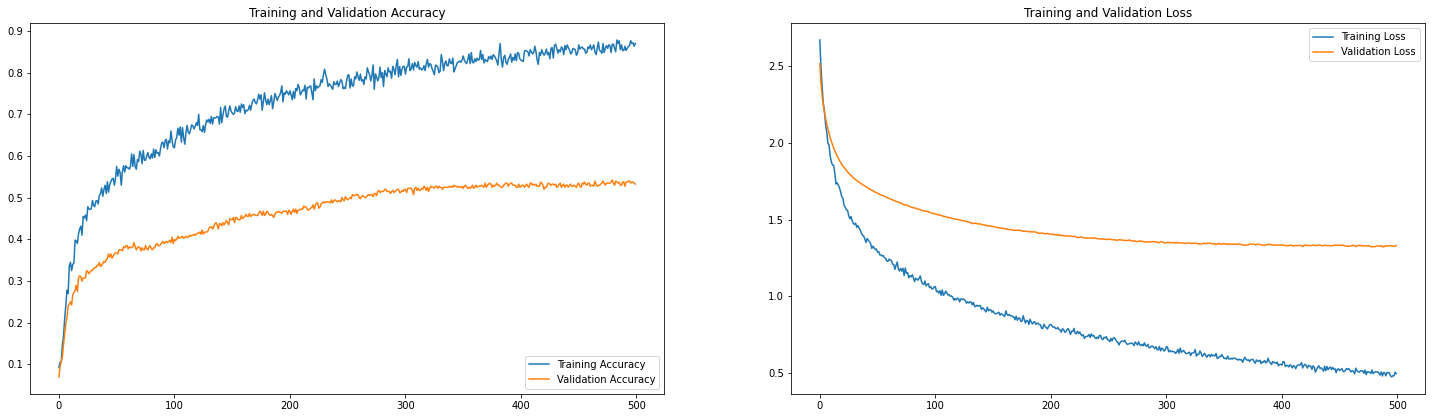

In [53]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
import pickle
history = pickle.load(open('history_500_epoch_tr.pkl','rb'))
#history = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('tfr_plot1.png',bbox_inches = 'tight')
plt.clf()

FileNotFoundError: [Errno 2] No such file or directory: 'history_500_epoch_tr.pkl'

In [61]:
predictions = np.argmax(model.predict(x_val), axis=-1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

              precision    recall  f1-score   support

       blues       0.42      0.55      0.47        40
   classical       0.92      0.88      0.90        40
     country       0.39      0.30      0.34        40
       disco       0.42      0.42      0.42        40
      hiphop       0.45      0.72      0.56        40
        jazz       0.78      0.62      0.69        40
       metal       0.71      0.60      0.65        40
         pop       0.87      0.68      0.76        40
      reggae       0.37      0.33      0.35        40
        rock       0.21      0.23      0.22        40

    accuracy                           0.53       400
   macro avg       0.55      0.53      0.54       400
weighted avg       0.55      0.53      0.54       400



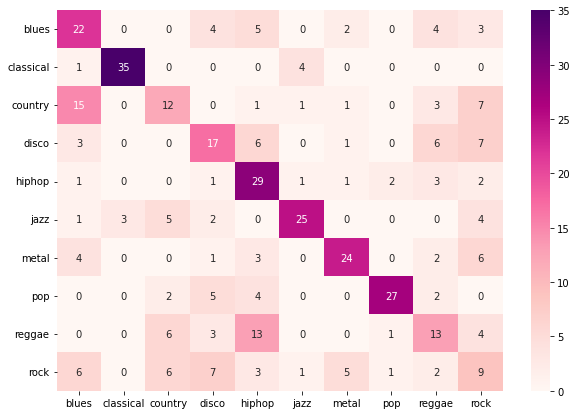

In [62]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx2.png',bbox_inches = 'tight')

In [63]:
model.save_weights('500_epoch_transfer_lr.cpkt')
pickle.dump(history1.history, open('history_500_epoch_tr.pkl','wb'))


## Multi-Model Training

In [ ]:
sp_train = get_data('spectrogram/train')
sp_val = get_data('spectrogram/test')

wv_train = get_data('wavelets/train')
wv_val = get_data('wavelets/test')

In [ ]:
x_sp_train = []
y_sp_train = []
x_sp_val = []
y_sp_val = []

for feature, label in sp_train:
  x_sp_train.append(feature)
  y_sp_train.append(label)

for feature, label in sp_val:
  x_sp_val.append(feature)
  y_sp_val.append(label)

# Normalize the data
x_sp_train = np.array(x_sp_train) / 255
x_sp_val = np.array(x_sp_val) / 255

x_sp_train.reshape(-1, img_size, img_size, 1)
y_sp_train = np.array(y_sp_train)

x_sp_val.reshape(-1, img_size, img_size, 1)
y_sp_val = np.array(y_sp_val)

In [ ]:
x_wv_train = []
y_wv_train = []
x_wv_val = []
y_wv_val = []

for feature, label in wv_train:
  x_wv_train.append(feature)
  y_wv_train.append(label)

for feature, label in wv_val:
  x_wv_val.append(feature)
  y_wv_val.append(label)

# Normalize the data
x_wv_train = np.array(x_wv_train) / 255
x_wv_val = np.array(x_wv_val) / 255

x_wv_train.reshape(-1, img_size, img_size, 1)
y_wv_train = np.array(y_wv_train)

x_wv_val.reshape(-1, img_size, img_size, 1)
y_wv_val = np.array(y_wv_val)

In [9]:
datagen_sp = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_sp.fit(x_sp_train)

datagen_wv = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_wv.fit(x_wv_train)

NameError: name 'x_sp_train' is not defined

In [ ]:
input_sp = keras.Input(shape=(256,256,3))
input_wv = keras.Input(shape=(256,256,3))

x = Conv2D(32,3,padding="same", activation="relu")(input_sp)
x = MaxPool2D()(x)
x = Conv2D(64, 3, padding="same", activation="relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(128,activation="relu")(x)
x = keras.Model(inputs=input_sp, outputs=x)

y = Conv2D(32,3,padding="same", activation="relu")(input_wv)
y = MaxPool2D()(y)
y = Conv2D(64, 3, padding="same", activation="relu")(y)
y = MaxPool2D()(y)
y = Dropout(0.4)(y)
y = Flatten()(y)
y = Dense(128,activation="relu")(y)
y = keras.Model(inputs=input_wv, outputs=y)

from tensorflow.keras.layers import concatenate
combined = concatenate([x.output, y.output])

z = Dense(32, activation="relu")(combined)
z = Dense(10, activation="softmax")(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
model.summary()

In [ ]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history2 = model.fit([x_sp_train,x_wv_train],y_sp_train,epochs = 500, validation_data = ([x_sp_val,x_wv_val], y_sp_val))
import pickle
model.save_weights('500_epoch_multi_lr.cpkt')
pickle.dump(history2.history, open('history_500_epoch_multi.pkl','wb'))

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
import pickle
history = pickle.load(open('history_500_epoch_multi.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('multi_plot1.png',bbox_inches = 'tight')
plt.clf()

FileNotFoundError: [Errno 2] No such file or directory: 'history_500_epoch_multi.pkl'

In [ ]:
predictions = model.predict([x_sp_val,x_wv_val])
print(classification_report(y_wv_val, np.argmax(predictions, axis=1), target_names = labels))

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
predictions = np.argmax(predictions, axis=1)
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx3.png',bbox_inches = 'tight')

In [ ]:
epochs_range = range(500)
import matplotlib.pyplot as plt
import pickle 
history = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

history = pickle.load(open('history_500_epoch_tr.pkl','rb'))
acc1 = history['accuracy']
val_acc1 = history['val_accuracy']
loss1 = history['loss']
val_loss1 = history['val_loss']

history = pickle.load(open('history_500_epoch_multi.pkl','rb'))
acc2 = history['accuracy']
val_acc2 = history['val_accuracy']
loss2 = history['loss']
val_loss2 = history['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='CNN Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='CNN Validation Accuracy', c='red', linewidth=4)
ax1.plot(epochs_range, acc1, label='Transfer learning Training Accuracy', c = '#e72866', linewidth=4)
ax1.plot(epochs_range, val_acc1, label='Transfer learning Validation Accuracy', c='#282ec7', linewidth=4)
ax1.plot(epochs_range, acc2, label='Multi modal Training Accuracy', c = '#171c1c', linewidth=4)
ax1.plot(epochs_range, val_acc2, label='Multi modal Validation Accuracy', c='#62176e', linewidth=4)

ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='CNN Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='CNN Validation Loss', c='red', linewidth=4)
ax2.plot(epochs_range, loss1, label='Transfer learning Training Loss',c = '#c72866', linewidth=4)
ax2.plot(epochs_range, val_loss1, label='Transfer learning Validation Loss', c='#282ec7', linewidth=4)
ax2.plot(epochs_range, loss2, label='Multi modal Training Loss',c = '#171c1c', linewidth=4)
ax2.plot(epochs_range, val_loss2, label='Multi modal learning Validation Loss', c='#62176e', linewidth=4)

ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('all_1.png',bbox_inches = 'tight')
plt.clf()